In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("car.data")
data.columns = ['Buying', 'Maintainance_Cost', 'No_of_Doors', 'Person_Capacity','Luggage_Size','Safety','Evaluation']

In [3]:
data.head()

,Buying,Maintainance_Cost,No_of_Doors,Person_Capacity,Luggage_Size,Safety,Evaluation
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
data.describe()

,Buying,Maintainance_Cost,No_of_Doors,Person_Capacity,Luggage_Size,Safety,Evaluation
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,low,low,4,more,big,high,unacc
freq,432,432,432,576,576,576,1209


In [5]:
#Assigning integer value to each unique data(Integer encoding)
data.Buying.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
data.Maintainance_Cost.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
data.No_of_Doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
data.Person_Capacity.replace(('2','4','more'),(1,2,3), inplace=True)
data.Luggage_Size.replace(('small','med','big'),(1,2,3), inplace=True)
data.Safety.replace(('low','med','high'),(1,2,3), inplace=True)
data.Evaluation.replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

In [6]:
#Seperating independent and dependent attributes
x = data.loc[:,'Buying':'Safety']
y = data.loc[:, ['Evaluation']]

In [7]:
# variable x holds list of independent attributes
print (x)

      Buying  Maintainance_Cost  No_of_Doors  Person_Capacity  Luggage_Size  \
0          1                  1            1                1             1   
1          1                  1            1                1             1   
2          1                  1            1                1             2   
3          1                  1            1                1             2   
4          1                  1            1                1             2   
...      ...                ...          ...              ...           ...   
1722       4                  4            4                3             2   
1723       4                  4            4                3             2   
1724       4                  4            4                3             3   
1725       4                  4            4                3             3   
1726       4                  4            4                3             3   

      Safety  
0          2  
1          3  
2     

In [9]:
# variable y holds list of dependent attributes
print (y)

      Evaluation
0              1
1              1
2              1
3              1
4              1
...          ...
1722           3
1723           4
1724           1
1725           3
1726           4

[1727 rows x 1 columns]


In [10]:
#Library for train,test split and KNN model 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#90% data is splitted for training and rest 10% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [12]:
x_train.shape,y_train.shape

((1554, 6), (1554, 1))

In [14]:
x_test.shape,y_test.shape

((173, 6), (173, 1))

In [15]:
#Training KNN model of nearest neighbour form 1 to 10 using Euclidean Distance
acc_list = []
j = []
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors = i, metric='euclidean')
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    acc_list.append(accuracy)
    j.append(i)

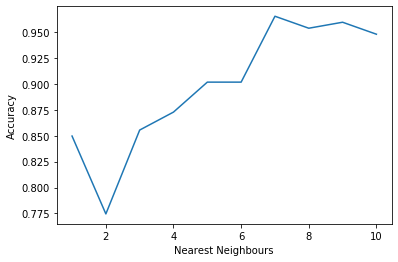

In [16]:
#plotting graph for the best value of nearest neighbour
from matplotlib import pyplot as plt
plt.plot(j,acc_list)
plt.xlabel('Nearest Neighbours')
plt.ylabel('Accuracy')
plt.show()

In [17]:
# Taking nearest neighbour value having highest accuracy
k = acc_list.index(max(acc_list))+1
model = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
model.fit(x_train, y_train)
print ("KNN model fitted with", k ,"nearest neighbour")

KNN model fitted with 7 nearest neighbour


In [19]:
predictions = model.predict(x_test)

In [20]:
#naming integers back to label names
labels = ["unacc", "acc", "good", "vgood"]
label_list =[]
for i in predictions:
    label_list.append(labels[i-1])

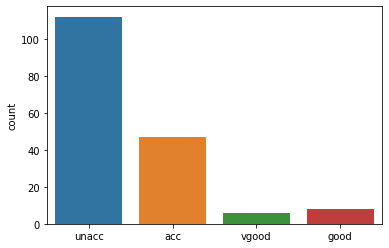

In [21]:
#making a bar-graph of the testing data labels
import seaborn as sns
sns.countplot(label_list)

In [22]:
x_test.describe()

,Buying,Maintainance_Cost,No_of_Doors,Person_Capacity,Luggage_Size,Safety
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,2.578035,2.543353,2.433526,2.040462,2.034682,1.965318
std,1.105474,1.112625,1.132207,0.787684,0.834545,0.798952
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000
75%,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000


In [26]:
#Predicting own custom value
prediction1 = model.predict([['4','4','3','3','3','2']])
j = (prediction1[0])
print (labels[j-1])

good
